In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_rates=pd.read_csv('Ressources/MovieLens/ratings.csv')

In [81]:
print("Unique Userids:",df_rates.userId.nunique())
print("Rows:",len(df_rates))
#print("Most frequent Users:\n",df_rates.userId.value_counts().head(10))
#print("Less rated Movies:\n",df_rates.movieId.value_counts().head(10))
print("Quantiles UserID Counts\n",df_rates.userId.value_counts().to_frame("Counts").quantile(q=[0.25,0.5,0.75]))
print("Quantiles MovieID Counts\n",df_rates.movieId.value_counts().to_frame("Counts").quantile(q=[0.25,0.5,0.75]))

###Extrem Values
# Should we exclude ratings from Users who gave votes for more movies than usual
# Should we exclude ratings where we have less ratings?
df_rates_userid_counts=df_rates.userId.value_counts().to_frame("Counts")
df_rates_userid_counts_quantile=df_rates_userid_counts.quantile(q=[0.25,0.5,0.75])
df_rates_userid_counts_extrem=(df_rates_userid_counts_quantile.iloc[2,0]-df_rates_userid_counts_quantile.iloc[0,0])*1.5+df_rates_userid_counts_quantile.iloc[2,0]
print("#Ratings from User with extrem number of ratings:",df_rates_userid_counts[df_rates_userid_counts.Counts>df_rates_userid_counts_extrem].sum().iloc[0])
print("#Ratings from User with normal number of ratings:",df_rates_userid_counts[df_rates_userid_counts.Counts<=df_rates_userid_counts_extrem].sum().iloc[0])


Unique Userids: 138493
Rows: 20000263
Quantiles UserID Counts
       Counts
0.25    35.0
0.50    68.0
0.75   155.0
Quantiles MovieID Counts
       Counts
0.25     3.0
0.50    18.0
0.75   205.0
#Ratings from User with extrem number of ratings: 9130048
#Ratings from User with normal number of ratings: 10870215


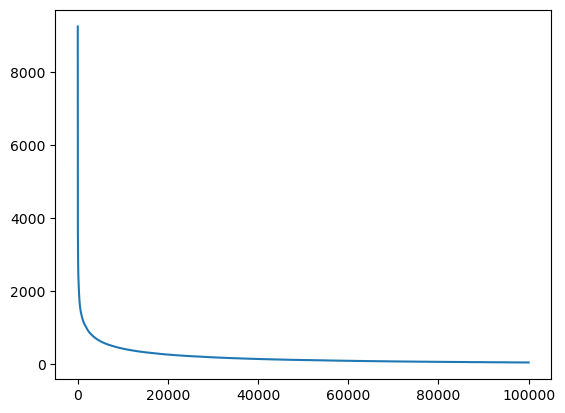

In [57]:
plt.plot(df_rates.groupby(by='userId').size().to_frame("Counts").reset_index().sort_values(by='Counts', ascending=False).reset_index().head(100000)['Counts'])

In [51]:
df_rates.groupby(by='userId').size().to_frame("Counts").reset_index().sort_values(by='Counts', ascending=False).reset_index().head(5)['Counts']

0    9254
1    7515
2    5646
3    5520
4    5491
Name: Counts, dtype: int64

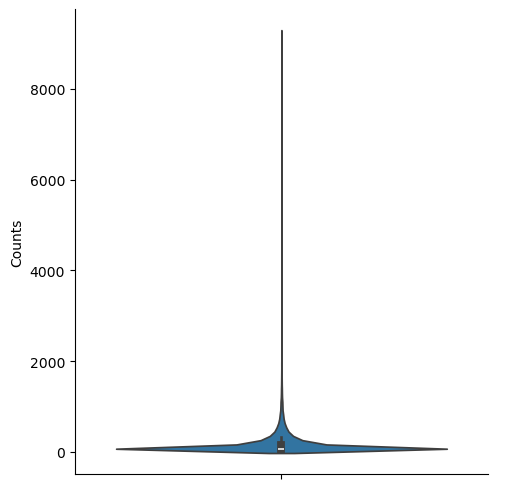

In [69]:
# User rates 
sns.catplot( y='Counts', kind='violin', data=df_rates.groupby(by='userId').size().to_frame("Counts"))

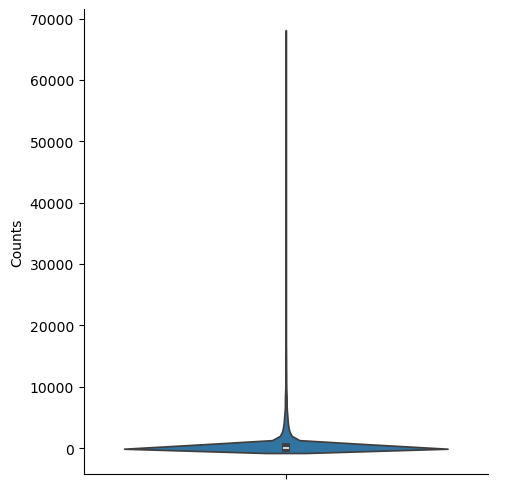

In [70]:
sns.catplot( y='Counts', kind='violin', data=df_rates.groupby(by='movieId').size().to_frame("Counts"))

In [4]:
df_rates.groupby(by='movieId').size().to_frame("Counts")

,Counts
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


In [14]:
df_rates.movieId.value_counts().to_frame("Counts")

,Counts
movieId,
296,67310
356,66172
318,63366
593,63299
480,59715
...,...
125545,1
78873,1
112907,1


In [12]:
df_rates.userId.value_counts(normalize=True)

userId
118205    4.626939e-04
8405      3.757451e-04
82418     2.822963e-04
121535    2.759964e-04
125794    2.745464e-04
              ...     
89305     9.999869e-07
110463    9.999869e-07
96990     9.999869e-07
134747    9.999869e-07
6526      9.999869e-07
Name: proportion, Length: 138493, dtype: float64

<Axes: ylabel='Counts'>

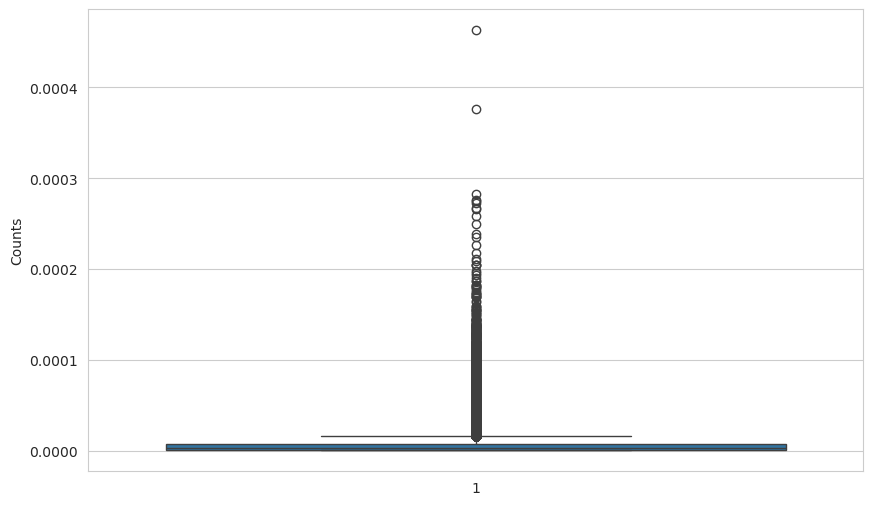

In [26]:
fig = plt.figure(figsize=(10,6))

sns.boxplot(x=1,y='Counts',data=df_rates.userId.value_counts(normalize=True).to_frame("Counts"))

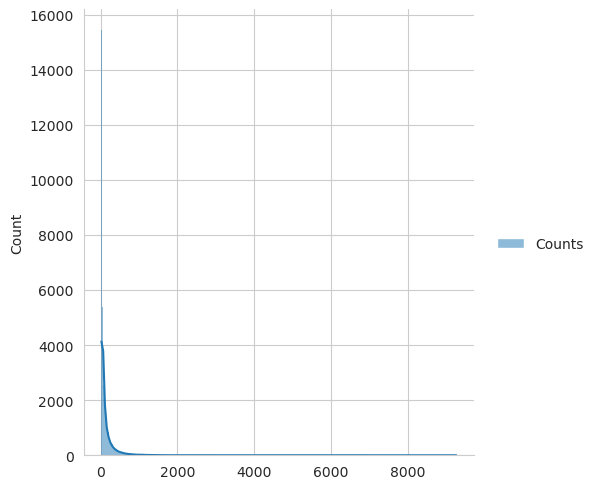

In [27]:
sns.displot(data=df_rates.userId.value_counts().to_frame("Counts"),kde=True)

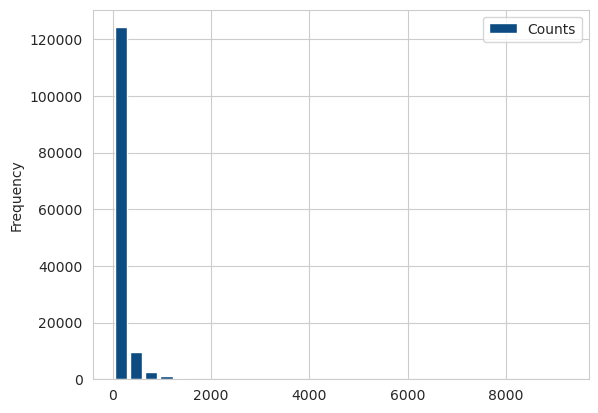

In [32]:
df_rates.userId.value_counts().to_frame("Counts").plot.hist(y=['Counts'], bins = 30, rwidth = 0.8 , color= ['#0c4c83']);


In [36]:
df_rates.userId.value_counts().to_frame("Counts").quantile(q=[0.25,0.5,0.75])

,Counts
0.25,35.0
0.50,68.0
0.75,155.0


In [43]:
df_rates_userid_counts=df_rates.userId.value_counts().to_frame("Counts")

<Axes: ylabel='Counts'>

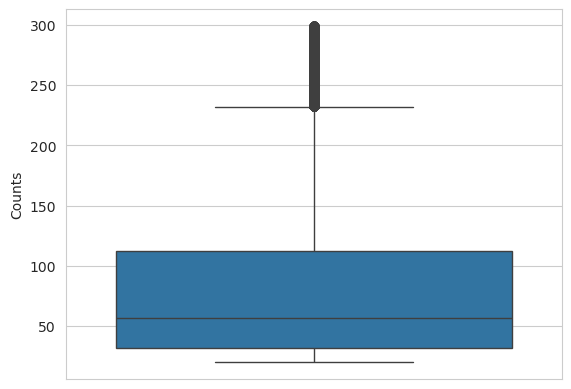

In [54]:
sns.boxplot(y="Counts", data=df_rates_userid_counts[df_rates_userid_counts.Counts<300])

In [77]:
df_rates_userid_counts=df_rates.userId.value_counts().to_frame("Counts")
df_rates_userid_counts_quantile=df_rates_userid_counts.quantile(q=[0.25,0.5,0.75])
df_rates_userid_counts_extrem=(df_rates_userid_counts_quantile.iloc[2,0]-df_rates_userid_counts_quantile.iloc[0,0])*1.5+df_rates_userid_counts_quantile.iloc[2,0]
df_rates_userid_counts[df_rates_userid_counts.Counts>df_rates_userid_counts_extrem].sum()
df_rates_userid_counts[df_rates_userid_counts.Counts<=df_rates_userid_counts_extrem].sum()

Counts    10870215
dtype: int64

335.0